In [1]:
# importing libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle
Diamonds=shuffle(sns.load_dataset('diamonds'))

In [2]:
# checking data
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
2340,0.83,Very Good,G,SI1,62.3,58.0,3171,5.97,6.01,3.73
39644,0.41,Ideal,F,VS2,62.4,58.0,1085,4.77,4.75,2.97
20333,1.50,Ideal,G,SI2,62.0,57.0,8736,7.31,7.26,4.52
33762,0.40,Very Good,G,SI1,63.2,58.0,840,4.70,4.61,2.94
21078,1.50,Premium,H,VS2,62.1,59.0,9253,7.26,7.20,4.49


In [3]:
Diamonds.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [4]:
Diamonds.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [5]:
Diamonds.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [6]:
# recoding cut
def recode_cut(series):
    if series=="Ideal":
        return 0
    if series=="Premium":
        return 1
    if series=="Very Good":
        return 2
    if series=="Good":
        return 3
    if series=="Fair":
        return 4

In [7]:
# recoding color
def recode_color (series):
    if series=="G":
        return 0
    if series=="E":
        return 1
    if series=="F":
        return 2
    if series=="H":
        return 3
    if series=="D":
        return 4
    if series=="I":
        return 5
    if series=="J":
        return 6

In [8]:
# recoding clarity
def recode_clarity(series):
    if series=="SI1":
        return 0
    if series=="VS2":
        return 1
    if series=="SI2":
        return 2
    if series=="VS1":
        return 3
    if series=="VVS2":
        return 4
    if series=="VVS1":
        return 5
    if series=="IF":
        return 6
    if series=="I1":
        return 7

In [9]:
# applying recoded variables to data
Diamonds['cutR']=Diamonds['cut'].apply(recode_cut)
Diamonds['colorR']=Diamonds['color'].apply(recode_color)
Diamonds['clarityR']=Diamonds['clarity'].apply(recode_clarity)

In [10]:
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cutR,colorR,clarityR
2340,0.83,Very Good,G,SI1,62.3,58.0,3171,5.97,6.01,3.73,2,0,0
39644,0.41,Ideal,F,VS2,62.4,58.0,1085,4.77,4.75,2.97,0,2,1
20333,1.50,Ideal,G,SI2,62.0,57.0,8736,7.31,7.26,4.52,0,0,2
33762,0.40,Very Good,G,SI1,63.2,58.0,840,4.70,4.61,2.94,2,0,0
21078,1.50,Premium,H,VS2,62.1,59.0,9253,7.26,7.20,4.49,1,3,1


In [11]:
Diamonds.price.value_counts()

605      132
802      127
625      126
828      125
776      124
        ... 
14620      1
13133      1
6844       1
14667      1
17574      1
Name: price, Length: 11602, dtype: int64

In [12]:
Diamonds.carat.value_counts()

0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
        ... 
4.13       1
2.64       1
4.50       1
3.24       1
2.67       1
Name: carat, Length: 273, dtype: int64

In [13]:
# price and carat already int - assigning variables
x=Diamonds[['carat', 'cutR', 'colorR', 'clarityR']]
y=Diamonds['price']

In [14]:
# train test split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.4, random_state=101)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(32364, 4) (32364,)
(21576, 4) (21576,)


In [15]:
# 32364 rows and 4 columns in xtrain and 21576 rows and 4 columns in xtest - creating linear model
lmDiamonds=LinearRegression()
lmDiamonds.fit(x_train, y_train)

LinearRegression()

In [16]:
# creating predictions
predictionsDiamonds=lmDiamonds.predict(x_test)
predictionsDiamonds

array([ -443.9568686 ,  5932.98381824, -1278.24196754, ...,
        4211.63249766,  2490.38678848,  1959.92798495])

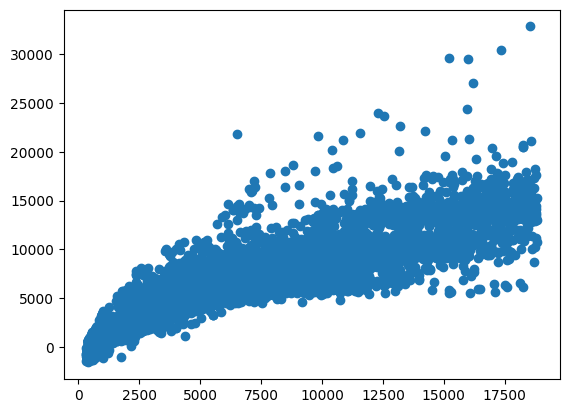

In [17]:
# creating scatter plot
plt.scatter(y_test, predictionsDiamonds)

In [18]:
# looks to be linear - testing accuracy
print("Score:", lmDiamonds.score(x_test, y_test))

Score: 0.8639913019017926


In [19]:
# model is approx 86% accurate
## MAE
metrics.mean_absolute_error(y_test, predictionsDiamonds)

956.2464598486204

In [20]:
# MSE
metrics.mean_squared_error(y_test, predictionsDiamonds)

2202368.594206668

In [21]:
# RMSE
np.sqrt(metrics.mean_squared_error(y_test, predictionsDiamonds))

1484.037935568585

In [22]:
# cross validating data
## importing packages
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [23]:
DiamondkFold=KFold(n_splits=5, shuffle=True, random_state=1)
for train, test in DiamondkFold.split(x,y):
    print('train: %s, test: %s' % (train, test))

train: [    0     1     2 ... 53937 53938 53939], test: [   10    12    23 ... 53906 53911 53913]
train: [    0     1     4 ... 53936 53938 53939], test: [    2     3     8 ... 53934 53935 53937]
train: [    1     2     3 ... 53937 53938 53939], test: [    0    26    29 ... 53922 53933 53936]
train: [    0     2     3 ... 53937 53938 53939], test: [    1     4     5 ... 53927 53930 53931]
train: [    0     1     2 ... 53935 53936 53937], test: [    9    14    15 ... 53929 53938 53939]


In [24]:
print(cross_val_score(lmDiamonds, x,y, cv=5))

[0.85896867 0.86717726 0.86491667 0.85979611 0.86881751]


In [1]:
# 1st model 86% accurate, 2nd model 87% accurate, 3rd model 86% accurate, 4th model 86% accurate, 5th model 87% accurate